In [1]:
from IPython.core.display import display,HTML
HTML('''<style>.CodeMirror{min-height:100% !important;}</style>''')

 <div>
<img src="https://edlitera-images.s3.amazonaws.com/new_edlitera_logo.png" width="500"/>
</div>

# `Data Preprocessing - classic Machine Learning`

* already talked about it in the previous chapter



* let's refresh our memory while also preparing the data that we will be training our different `Machine Learning` models on

* preprocessing data for Deep Learning is a little bit different
    * we only talked about **sparse representations (bag of words, TFIDF)** 
    * we will explain **dense representations** later

## `NLP data preprocessing steps`



**`Preliminary steps`**

* **deal with missing data and duplicates** - when working on different tasks always make sure that you are not missing any data, and be careful when there are duplicates (sometimes you can remove them, sometimes you can't)
    * the decision to remove duplicates or leave them in mostly depends on your data (if it is supposed to contain duplicates or not)


* **check spelling** - doesn't apply always, some types of text data do not need to necessarily follow standard rules ( e.g. slang)


* **remove contractions** - different `NLP` libraries that we use for preprocessing work much better when we don't have any contractions, which is why we prefer text that contains phrases such as "do not" instead of "don't"


* **other steps (sometimes optional, sometimes necessary) -** one-hot encoding, dealing with data imbalance, etc.

**`Standard data preprocessing`**

* **tokenization** - separating documents into sentences and sentences into words


* **lowercase data and remove stopwords** - lowercase data to make sure that you will preprocess "My" and "my" the same (this is especially important for removing stopwords because stopwords corpora that we use to remove stopwords are in lowercase)


* **stemming or lemmatization -** performing both is usually redundant, you can decide on one of them by first performing `stemming`, checking your results (e.g. F1 score) and then doing the same for `lemmatization` (take into account that performing `lemmatization` is more complex because you need to supply a `POS tag` for each word you want to preprocess)

**`Sparse representations`**


* create a **Document Term Matrix**
* **pick between Bag-of-words and TFIDF -** we can pick any of these two representations
    * however do keep in mind that in most cases `Machine Learning` models that use `TFIDF` will perform better than those that use `Bag-of-words`

# `Data acquisition`

* nowadays there is plenty of data available for training models even taking into consideration that **`Machine Learning`** models require A LOT of data (**`Deep Learning`** models even more)

* one caveat - data must be of high quality
     * models do not tolerate bad data, it is not only useless but counterproductive

* lack of data can be somewhat remedied using **`transfer learning`** (more on that in the **`Deep Learning`** chapter of this course)

# `Preliminary steps`

* for the purposes of this example, we will use a modified version of the publicly available "Wine Reviews" dataset


* original dataset: https://www.kaggle.com/zynicide/wine-reviews


* we want to create an ML model that can classify a wine as either good or bad based on the text review of the wine

In [2]:
# Let's first import the libraries we will use

import pandas as pd

In [3]:
# Create a DataFrame

df = pd.read_csv("https://edlitera-datasets.s3.amazonaws.com/wine_data_classification.csv")

In [4]:
# Take a look at the first five rows of our dataframe

df.head()

,description,wine_type
0,"Aromas include tropical fruit, broom, brimston...",great_wine
1,"This is ripe and fruity, a wine that is smooth...",great_wine
2,"Tart and snappy, the flavors of lime flesh and...",great_wine
3,"Pineapple rind, lemon pith and orange blossom ...",great_wine
4,"Much like the regular bottling from 2012, this...",great_wine


* we will for now ignore **"wine_type"** which is our label, and focus on our actual data which is inside the **"description"** column

* first we will check for missing data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  129971 non-null  object
 1   wine_type    129971 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


* it seems that our dataset isn't missing any data

* in this case, having duplicates is not good
    * there shouldn't be any two descriptions that are completely the same


* let's check for duplicates

In [6]:
# Check for duplicates

df.duplicated(subset=["description"]).any()

True

* there seem to be some duplicates - let's get rid of them

In [7]:
# Get rid of duplicates

df.drop_duplicates(subset=["description"], inplace=True)

# Check if you successfully removed the duplicates

df.duplicated(subset=["description"]).any()

False

In [8]:
# Take a look at the last five rows of our dataframe

df.tail()

,description,wine_type
129966,Notes of honeysuckle and cantaloupe sweeten th...,great_wine
129967,Citation is given as much as a decade of bottl...,great_wine
129968,Well-drained gravel soil gives this wine its c...,great_wine
129969,"A dry style of Pinot Gris, this is crisp with ...",great_wine
129970,"Big, rich and off-dry, this is powered by inte...",great_wine


* we could check if the words are spelled correctly right now, but we'll skip this for now

* let's see if we can remove the contractions present in the text

In [9]:
# Import RegEx

import re

# Create a function that deals with contractions
# Very useful snippet of code

def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [10]:
# Deal with contractions

df["description_simple_contraction_removal"] = df["description"].apply(decontracted)

In [11]:
# Take a look at the dataframe

df

,description,wine_type,description_simple_contraction_removal
0,"Aromas include tropical fruit, broom, brimston...",great_wine,"Aromas include tropical fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth...",great_wine,"This is ripe and fruity, a wine that is smooth..."
2,"Tart and snappy, the flavors of lime flesh and...",great_wine,"Tart and snappy, the flavors of lime flesh and..."
3,"Pineapple rind, lemon pith and orange blossom ...",great_wine,"Pineapple rind, lemon pith and orange blossom ..."
4,"Much like the regular bottling from 2012, this...",great_wine,"Much like the regular bottling from 2012, this..."
...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,great_wine,Notes of honeysuckle and cantaloupe sweeten th...
129967,Citation is given as much as a decade of bottl...,great_wine,Citation is given as much as a decade of bottl...
129968,Well-drained gravel soil gives this wine its c...,great_wine,Well-drained gravel soil gives this wine its c...
129969,"A dry style of Pinot Gris, this is crisp with ...",great_wine,"A dry style of Pinot Gris, this is crisp with ..."


## Alternative approach: using a dictionary to map contractions



* if we want to make sure that we take into account all possible contraction, the procedure of replacing them becomes much more complex (but also more precise)

In [12]:
contractions = { 
        "ain't": "are not","'s":" is","aren't": "are not","can't": "cannot","can't've": "cannot have",
        "'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have", 
        "didn't": "did not","doesn't": "does not",
        "don't": "do not","hadn't": "had not","hadn't've": "had not have",
        "hasn't": "has not","haven't": "have not","he'd": "he would",
        "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
        "how'd": "how did","how'd'y": "how do you","how'll": "how will",
        "I'd": "I would", "I'd've": "I would have","I'll": "I will",
        "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
        "it'd": "it would","it'd've": "it would have","it'll": "it will",
        "it'll've": "it will have", "let's": "let us","ma'am": "madam",
        "mayn't": "may not","might've": "might have","mightn't": "might not", 
        "mightn't've": "might not have","must've": "must have","mustn't": "must not",
        "mustn't've": "must not have", "needn't": "need not",
        "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
        "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
        "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
        "she'll": "she will", "she'll've": "she will have","should've": "should have",
        "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
        "that'd": "that would","that'd've": "that would have", "there'd": "there would",
        "there'd've": "there would have", "they'd": "they would",
        "they'd've": "they would have","they'll": "they will",
        "they'll've": "they will have", "they're": "they are","they've": "they have",
        "to've": "to have","wasn't": "was not","we'd": "we would",
        "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
        "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
        "what'll've": "what will have","what're": "what are", "what've": "what have",
        "when've": "when have","where'd": "where did", "where've": "where have",
        "who'll": "who will","who'll've": "who will have","who've": "who have",
        "why've": "why have","will've": "will have","won't": "will not",
        "won't've": "will not have", "would've": "would have","wouldn't": "would not",
        "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
        "y'all'd've": "you all would have","y'all're": "you all are",
        "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
        "you'll": "you will","you'll've": "you will have", "you're": "you are",
        "you've": "you have"}

In [13]:
# Find contractions

contractions_find = re.compile("(%s)" % "|".join(contractions.keys()))


In [14]:
# Create function for replacing contractions

def replace_contraction(text, contractions_dictionary=contractions):
    def expand(matched):
        return contractions_dictionary[matched.group(0)]
    return contractions_find.sub(expand, text)

In [15]:
# Replace contractions

df["description"] = df["description"].apply(lambda text: replace_contraction(text))

## One-hot encoding

* we want our label column to be numerical, so let's one-hot encode it
    <br>
    
    * we will encode "great wine" to 0, and "superior wine" to 1

In [16]:
# One-hot encode data

df["wine_type"] = df["wine_type"].map({"great_wine":0, "superior_wine":1})

## Dealing with data imbalance

In [17]:
 # Select the class you need to undersample
sorted_counts = (
    df["wine_type"]
    .value_counts()
    .sort_values(ascending=False)
    )

In [18]:
# Filter data

majority_class = df[df["wine_type"] == sorted_counts.index[0]]
minority_class = df[df["wine_type"] == sorted_counts.index[1]]


In [19]:
# Undersample the majority class

majority_class_undersampled = majority_class.sample(sorted_counts[1])

In [20]:
# Create modified DataFrame
df = pd.concat(
    [majority_class_undersampled, minority_class],
    axis=0
    )

# `Standard data preprocessing`

* **tokenization** - separating documents into sentences and sentences into words


* **lowercase data and remove stopwords** - lowercase data to make sure that you will preprocess "My" and "my" the same (this is especially important for removing stopwords because stopwords corpora that we use to remove stopwords are in lowercase)


* **stemming or lemmatization -** performing both is usually redundant, you can decide on one of them by first performing `stemming`, checking your results (e.g. F1 score) and then doing the same for `lemmatization` (take into account that performing `lemmatization` is more complex because you need to supply a `POS tag` for each word you want to preprocess)

### `Tokenization`

* we first need to tokenize our data
    * let's also lowercase it since we will need to do that sooner or later anyway

In [21]:
# Import the necessary libraries

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [22]:
df["description"]= df["description"].str.lower()

In [23]:
tokenizer = RegexpTokenizer(r"\w+")

words = df["description"].apply(tokenizer.tokenize)

In [24]:
words.head()

85193    [a, bright, fruity, nose, of, tart, cherry, an...
86993    [this, is, a, rich, wine, a, reminder, of, the...
68458    [with, a, nose, of, cherry, and, smoked, meats...
55022    [a, blend, of, 60, shiraz, and, 40, cinsault, ...
4269     [with, 20, merlot, and, 5, cabernet, franc, th...
Name: description, dtype: object

### `Stopwords removal`

* now we can remove stopwords


* always remove stopwords to avoid unnecessarily spending resources on stemming or lemmatizing them

In [25]:
# Define a list of stopwords

stopword_list = stopwords.words("english")

# Remove stopwords

words_without_stopwords = words.apply(lambda i: [word for word in i if not word in stopword_list])

In [26]:
# Take a look at the old version of words Series

words.head()

85193    [a, bright, fruity, nose, of, tart, cherry, an...
86993    [this, is, a, rich, wine, a, reminder, of, the...
68458    [with, a, nose, of, cherry, and, smoked, meats...
55022    [a, blend, of, 60, shiraz, and, 40, cinsault, ...
4269     [with, 20, merlot, and, 5, cabernet, franc, th...
Name: description, dtype: object

In [27]:
# Take a look at the new version of words Series

words_without_stopwords.head()

85193    [bright, fruity, nose, tart, cherry, cranberry...
86993    [rich, wine, reminder, warmth, alentejo, reinf...
68458    [nose, cherry, smoked, meats, wine, offers, fl...
55022    [blend, 60, shiraz, 40, cinsault, well, balanc...
4269     [20, merlot, 5, cabernet, franc, wine, muted, ...
Name: description, dtype: object

### `Stemming`

* we could perform stemming or lemmatization

* since lemmatization doesn't really perform satisfactory without POS tags, we will choose to perform stemming (to keep things simple)

* we will use the Snowball stemmer from NLTK

In [28]:
# Import the necessary library

from nltk.stem.snowball import SnowballStemmer

In [29]:
# Define the stemmer we will use

snowball_stemmer = SnowballStemmer(language='english') # for Snowball Stemmer you need to define the language parameter

In [30]:
# Perform stemming

words_stemmed = words_without_stopwords.apply(lambda i: [snowball_stemmer.stem(word) for word in i])

In [31]:
# Take a look at the resulting Series

words_stemmed

85193     [bright, fruiti, nose, tart, cherri, cranberri...
86993     [rich, wine, remind, warmth, alentejo, reinfor...
68458     [nose, cherri, smoke, meat, wine, offer, flavo...
55022     [blend, 60, shiraz, 40, cinsault, well, balanc...
4269      [20, merlot, 5, cabernet, franc, wine, mute, y...
                                ...                        
129936    [blend, sever, premier, cru, vineyard, pommard...
129937    [smooth, creami, aroma, follow, rich, concentr...
129938    [compar, regular, 2006, malbec, chakana, wine,...
129939    [true, tba, rich, toffe, flavor, intens, sweet...
129940    [wineri, bell, whistl, chardonnay, grown, inla...
Name: description, Length: 63386, dtype: object

# `Document Term Matrix`

* before we create the **`Document Term Matrix`** we usually take a look at how many words we have in our data, and how big is our vocabulary (the number of unique words)

In [32]:
# Create a list of all stemmed words

all_words_stemmed = []
for tokens in words_stemmed:
    for word in tokens:
        all_words_stemmed.append(word)

# Create a vocabulary of unique words

vocabulary = sorted(list(set(all_words_stemmed)))

In [33]:
print("Total number of words:", len(all_words_stemmed))

print("Total number of unique words:", len(vocabulary))

Total number of words: 1719465
Total number of unique words: 18237


* it is always a good idea to take a look at what are the most common words in our data
    * sometimes by looking at our data we can remove some words from our vocabulary
    * knowing whether it is safe to remove some word is highly dependent on domain knowledge

In [34]:
# Take a look at the 25 most common words

from collections import Counter
count_stemmed_words = Counter(all_words_stemmed)
count_stemmed_words.most_common(25)

[('wine', 43490),
 ('flavor', 33545),
 ('fruit', 32477),
 ('acid', 19284),
 ('finish', 18989),
 ('palat', 18935),
 ('aroma', 18846),
 ('drink', 17666),
 ('tannin', 17430),
 ('cherri', 17162),
 ('black', 16264),
 ('ripe', 15337),
 ('rich', 13519),
 ('dri', 12722),
 ('spice', 12485),
 ('note', 12330),
 ('fresh', 10901),
 ('red', 10488),
 ('show', 10048),
 ('berri', 9194),
 ('oak', 9084),
 ('age', 8790),
 ('full', 8571),
 ('textur', 8483),
 ('nose', 8402)]

In [35]:
# Add the cleaned data to our original Dataframe

df["clean_description"] = words_stemmed.apply(lambda elem: " ".join(elem))

In [36]:
# Take a look at our dataframe

df

,description,wine_type,description_simple_contraction_removal,clean_description
85193,a bright fruity nose of tart cherry and cranbe...,0,A bright fruity nose of tart cherry and cranbe...,bright fruiti nose tart cherri cranberri yield...
86993,"this is a rich wine, a reminder of the warmth ...",0,"This is a rich wine, a reminder of the warmth ...",rich wine remind warmth alentejo reinforc cork...
68458,"with a nose of cherry and smoked meats, this w...",0,"With a nose of cherry and smoked meats, this w...",nose cherri smoke meat wine offer flavor black...
55022,"a blend of 60% shiraz and 40% cinsault, this i...",0,"A blend of 60% Shiraz and 40% Cinsault, this i...",blend 60 shiraz 40 cinsault well balanc attrac...
4269,"with 20% merlot and 5% cabernet franc, this wi...",0,"With 20% Merlot and 5% Cabernet Franc, this wi...",20 merlot 5 cabernet franc wine mute yet robus...
...,...,...,...,...
129936,a blend from several premier cru vineyards in ...,1,A blend from several premier cru vineyards in ...,blend sever premier cru vineyard pommard wine ...
129937,"smooth, creamy aromas are followed by a rich, ...",1,"Smooth, creamy aromas are followed by a rich, ...",smooth creami aroma follow rich concentr mouth...
129938,compared to the regular 2006 malbec from chaka...,1,Compared to the regular 2006 Malbec from Chaka...,compar regular 2006 malbec chakana wine step w...
129939,"a true tba, its very rich, toffee-flavored, in...",1,"A true TBA, its very rich, toffee-flavored, in...",true tba rich toffe flavor intens sweet overpo...


In [37]:
# Let's get rid of useless columnns
# we don't need them because we have a column with cleaned data

df.drop(columns=["description", "description_simple_contraction_removal"], inplace=True)

# Now we can see the final form of our Dataframe

df

,wine_type,clean_description
85193,0,bright fruiti nose tart cherri cranberri yield...
86993,0,rich wine remind warmth alentejo reinforc cork...
68458,0,nose cherri smoke meat wine offer flavor black...
55022,0,blend 60 shiraz 40 cinsault well balanc attrac...
4269,0,20 merlot 5 cabernet franc wine mute yet robus...
...,...,...
129936,1,blend sever premier cru vineyard pommard wine ...
129937,1,smooth creami aroma follow rich concentr mouth...
129938,1,compar regular 2006 malbec chakana wine step w...
129939,1,true tba rich toffe flavor intens sweet overpo...


* now that the Dataframe is ready we can define a vectorizer and use it to create the matrix

In [38]:
# First we import the vectorizer
# Using the Tfidf Vectorizer usually leads to better results than using the Bag-of-words vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# Let's shuffle the dataset now

df = df.sample(frac=1).reset_index(drop=True)

In [40]:
# Define the vectorizer

vectorizer = TfidfVectorizer(
    analyzer="word", 
    token_pattern=r"\w+",
    max_features=500
)

In [41]:
# Define dependent features

X = df["clean_description"]

# Define independent feature

y = df["wine_type"]

In [42]:
# Use the vectorizer to create an array of values
# Create a DataFrame that represents the Document Term Matrix

vectorized_X = vectorizer.fit_transform(X).toarray()


vectorized_X = pd.DataFrame(vectorized_X)

In [43]:
#vectorized = pd.DataFrame(vectorized, columns = vectorizer.get_feature_names())

In [44]:
# Take a look at the newly created DataFrame
# It actually represents our dependent features in
# classic Machine Learning terms

vectorized_X

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.372468,0.0,0.0
3,0.0,0.261358,0.0,0.0,0.0,0.0,0.221943,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63381,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
63382,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
63383,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.172785,0.0,0.0,0.0,0.000000,0.0,0.0
63384,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


# Picking a model

* we will use cross validation to check the results of training the following models:
    
    <br>
    
    * Decision Tree Classifier
    * Random Forest Classifier

* we will later focus on XGBoost

In [45]:
# Import the necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

* to see which of the aforementioned models performs best on our data, we will:
    * create a list of the models that we want to use
    * define our training and testing data
    * create a for loop that will perform cross validation for each of the models and give us the mean result of the different folds

In [46]:
# Create a list of models

models = []

models.append(("Decision Tree", DecisionTreeClassifier()))

models.append(("RandomForest", RandomForestClassifier()))

**Warning: running cross validation with the full dataset will take extremely long, so let's use just a small sample for the purposes of demonstration**

In [47]:
vectorized_X_sample = vectorized_X[:25_000]

y_sample = y[:25_000]

In [48]:
# Create a lists of results and names 
results = []
names = []

# Perform cross validation for the different models
for name, model in models:
    result = cross_val_score(model, vectorized_X_sample, y_sample,  cv=3)
    names.append(name)
    results.append(result)
    
# Display the results 
for i in range(len(names)):
    print(names[i], results[i].mean())

Decision Tree 0.682519890188456
RandomForest 0.7849200073114515


* the Decision Tree model seems to perform worse than the Random Forest model


* let's perform cross validation for XGBoost and compare the results with the results of the SVM model and the Random Forest model

### XGBoost

In [49]:
# Import the necessary libraries

from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn import metrics

C:\Users\Korisnik\.conda\envs\nlp_enviroment\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [50]:
# Cross-validation

kfold = KFold(n_splits=3)

XGBClassifier(eval_metric = "logloss")

results = cross_val_score(XGBClassifier(), vectorized_X, y, cv=kfold)

C:\Users\Korisnik\.conda\envs\nlp_enviroment\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Korisnik\.conda\envs\nlp_enviroment\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[13:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
# Let's take a look at the results

print(results.mean())

0.802274939503474


* the XGBoost model seems to perform a little bit better than the Random Forest model

# Training the choosen model

* since the XGBoost model seems to perform best, let's train it and see how well it actually performs
    * we will check not only the accuracy, but will also create a classification report and a confusion matrix

In [52]:
# Separate data into training data and testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=41
)

In [53]:
# Vectorize data 

vectorized_train_X = vectorizer.fit_transform(X_train).toarray()
vectorized_test_X = vectorizer.transform(X_test).toarray()

In [54]:
# Define a simple XGBoost classifier

classifier = XGBClassifier()

In [55]:
# Train the classifier

classifier.fit(vectorized_train_X, y_train)

[13:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# Predict values from the test dataset
# using the trained model

y_pred = classifier.predict(vectorized_test_X)

In [57]:
# Print model accuracy by comparing predictions with real values

accuracy_score = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score)

Accuracy: 0.7979596129575095


In [58]:
# As mentioned before, precision by itself is not a good enough measure
# for our model, so we will create a confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)

print(cm)

[[7497 1966]
 [1876 7677]]


Text(0.5, 1.0, 'Accuracy Score: 0.7979596129575095')

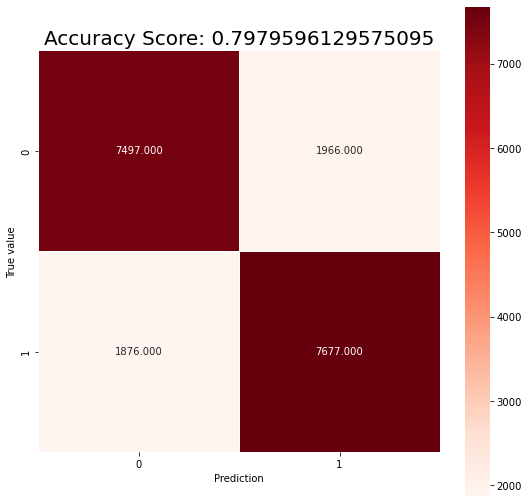

In [59]:
# Useful snippet of code 
# Used to construct a nicer looking confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Reds')
plt.ylabel("True value")
plt.xlabel("Prediction")
all_sample_title = f"Accuracy Score: {accuracy_score}"
plt.title(all_sample_title, size=20)

In [60]:
# Let's take a look at the classification report

print(metrics.classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      9463
           1       0.80      0.80      0.80      9553

    accuracy                           0.80     19016
   macro avg       0.80      0.80      0.80     19016
weighted avg       0.80      0.80      0.80     19016



In [61]:
# Get DataFrame of predictions

predictions = pd.DataFrame(y_pred, columns=["predicted_label"])

results = pd.concat([predictions, y_test.to_frame().reset_index(drop=True)], axis=1)

In [62]:
results.head(20)

,predicted_label,wine_type
0,1,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,1
6,1,1
7,1,1
8,1,1
9,0,0


In [63]:
# Decode predictions

results["predicted_label"] = results["predicted_label"].map({0:"great_wine", 1:"superior_wine"})
results["wine_type"] = results["wine_type"].map({0:"great_wine", 1:"superior_wine"})

results.head(20)

,predicted_label,wine_type
0,superior_wine,great_wine
1,superior_wine,superior_wine
2,superior_wine,superior_wine
3,superior_wine,superior_wine
4,great_wine,great_wine
5,great_wine,superior_wine
6,superior_wine,superior_wine
7,superior_wine,superior_wine
8,superior_wine,superior_wine
9,great_wine,great_wine


 <div>
<img src="https://edlitera-images.s3.amazonaws.com/new_edlitera_logo.png" width="500"/>
</div>